In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.python.keras.utils.np_utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
import numpy as np


In [33]:
data=pd.read_csv('/kaggle/input/playground-series-s5e7/personality_datasert.csv')

In [34]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [36]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from scikeras.wrappers import KerasClassifier
import numpy
from sklearn.model_selection import train_test_split,GridSearchCV


In [37]:
def create_model(optimizer='rmsprop',kernel_initalizer='uniform'):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(7,),kernel_initializer=kernel_initalizer))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu',kernel_initializer=kernel_initalizer))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='sigmoid',kernel_initializer=kernel_initalizer))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model



In [38]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [39]:
data.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [40]:
categorical_cols=data.select_dtypes(include='object').columns.to_list()

In [41]:
print(categorical_cols)

['Stage_fear', 'Drained_after_socializing', 'Personality']


In [42]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [43]:
print(X)

      Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0                  4.0         No                      4.0            6.0   
1                  9.0        Yes                      0.0            0.0   
2                  9.0        Yes                      1.0            2.0   
3                  0.0         No                      6.0            7.0   
4                  3.0         No                      9.0            4.0   
...                ...        ...                      ...            ...   
2895               3.0         No                      7.0            6.0   
2896               3.0         No                      8.0            3.0   
2897               4.0        Yes                      1.0            1.0   
2898              11.0        Yes                      1.0            3.0   
2899               3.0         No                      6.0            6.0   

     Drained_after_socializing  Friends_circle_size  Post_frequency  
0    

In [44]:
print(y)

0       Extrovert
1       Introvert
2       Introvert
3       Extrovert
4       Extrovert
          ...    
2895    Extrovert
2896    Extrovert
2897    Introvert
2898    Introvert
2899    Extrovert
Name: Personality, Length: 2900, dtype: object


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2320, 7)
(580, 7)
(2320,)
(580,)


In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [48]:
num_classes=2
y_train=to_categorical(y_train,num_classes=num_classes)
y_test=to_categorical(y_test,num_classes=num_classes)

In [49]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [50]:
X_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,No,4.0,6.0,No,13.0,5.0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0
3,0.0,No,6.0,7.0,No,14.0,8.0
4,3.0,No,9.0,4.0,No,8.0,5.0


In [51]:
cat_cols=['Stage_fear','Drained_after_socializing']
num_cols=['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

In [53]:
cat_pipeline=make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan))
num_pipeline=make_pipeline(StandardScaler())

In [54]:
ct=ColumnTransformer([("cat",cat_pipeline,cat_cols),("num",num_pipeline,num_cols)],verbose_feature_names_out=False).set_output(transform='pandas')

In [55]:
X_train=pd.DataFrame(ct.fit_transform(X_train),columns=ct.get_feature_names_out())
X_test=pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

In [56]:
X_train.head()

,Stage_fear,Drained_after_socializing,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,0.0,0.0,-0.163027,0.042440,1.319578,1.616392,0.510592
1,1.0,1.0,1.293601,-1.355529,-1.335217,-1.456407,-0.180949
2,1.0,1.0,1.293601,-1.006037,-0.450285,-0.274561,-0.526720
3,0.0,0.0,-1.328328,0.741424,1.762044,1.852761,1.547903
4,0.0,0.0,-0.454352,1.789900,0.434646,0.434546,0.510592


In [57]:
X_test.head()

,Stage_fear,Drained_after_socializing,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
2320,0.0,0.0,-0.015670,0.741424,-0.007819,1.380023,0.510592
2321,0.0,0.0,-0.454352,0.391932,1.319578,2.089130,0.510592
2322,1.0,1.0,1.293601,-0.656545,-0.450285,-1.220038,-0.526720
2323,0.0,0.0,-0.454352,1.440408,1.319578,0.198177,1.893673
2324,1.0,1.0,0.419624,-0.656545,-0.450285,-0.510931,-1.218261


In [58]:
#Best: 0.939224 using {'batch_size': 10, 'epochs': 50, 'optimizer': 'rmsprop'}

In [59]:
model=create_model()
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=10,epochs=50,verbose=1,validation_data=(X_test,y_test))
_, train_acc = model.evaluate(X_train,y_train,verbose=0)
_, test_acc = model.evaluate(X_test,y_test,verbose=0)
print('Train:%.3f, Test:%.3f' % (train_acc, test_acc))

Epoch 1/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8618 - loss: 0.5398 - val_accuracy: 0.9155 - val_loss: 0.3508
Epoch 2/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9363 - loss: 0.2761 - val_accuracy: 0.9155 - val_loss: 0.3514
Epoch 3/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.2589 - val_accuracy: 0.9155 - val_loss: 0.3429
Epoch 4/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9421 - loss: 0.2493 - val_accuracy: 0.9155 - val_loss: 0.3401
Epoch 5/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9398 - loss: 0.2508 - val_accuracy: 0.9155 - val_loss: 0.3438
Epoch 6/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9387 - loss: 0.2731 - val_accuracy: 0.9155 - val_loss: 0.3293
Epoch 7/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9387 - loss: 0.2587 - val_accuracy: 0.9155 - val_loss: 0.3299
Epoch 8/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.2740 - val_accuracy: 0.

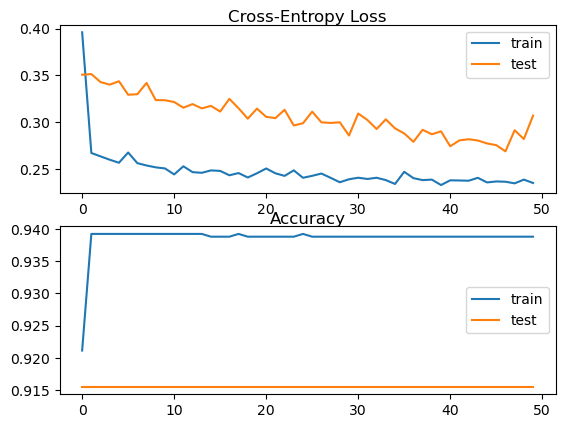

In [60]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()